In [12]:
import numpy as np
import matplotlib.pylab as plt

In [13]:
def f(x):
    return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2

def grad_f(x):
    return np.array([
        40*x[0] * (x[0]**2 - x[1]) + 2*x[0]-2,
        -20*x[0]**2 + 20*x[1]])
    
def hessian_f(x):
    return np.array([
        [120 * x[0]**2 - 40*x[1] + 2, -40*x[0]],
        [-40*x[0], 20]])

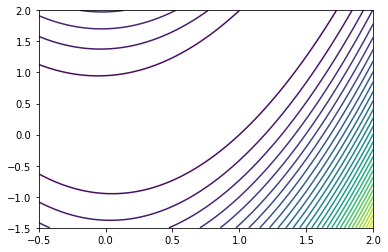

In [14]:
x = np.linspace(-0.5, 2, 100); y = np.linspace(-1.5, 2.0, 100)
X, Y = np.meshgrid(x, y); Z = f([X, Y])

plt.contour(X, Y, Z, levels=30)
plt.show()

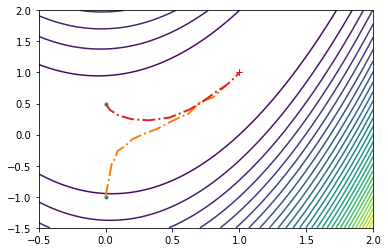

In [15]:
x = np.linspace(-0.5, 2, 100); y = np.linspace(-1.5, 2.0, 100)
X, Y = np.meshgrid(x, y); Z = f([X, Y])
plt.contour(X, Y, Z, levels=30)
min_x = np.array([1, 1])

for x0 in [np.array([0, -1]), np.array([0, 0.5])]:
    x = np.empty((20, 2), dtype=float)
    plt.plot(x0[0], x0[1], '.')
    plt.plot(min_x[0], min_x[1], 'r+')
    for i, delta in enumerate(np.linspace(1e-3, 2, x.shape[0])):
        if np.sum((min_x - x0)**2) < delta**2:
            x[i, :] = min_x
        else:
            min_f = 1e10
            for omega in np.linspace(0, 2*np.pi, 200):
                test_x = x0 + delta*np.array([np.cos(omega), np.sin(omega)])
                test_f = f(test_x)
                if test_f < min_f:
                    x[i, :] = test_x
                    min_f = test_f
    plt.plot(x[:, 0], x[:, 1], '-.', linewidth=2)

plt.show()